In [5]:
import os
import sys
sys.path.insert(1, '/Users/arijitsehanobish/efficient_graph_algorithms/src')
from convolutional_wass import convolutional_wasserstein_barycenter_2d
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import ot
import torch

In [6]:
mnist = fetch_openml('mnist_784', as_frame=False, cache=False)

In [7]:
X = mnist.data.astype('float32')
X /= 255.0


In [8]:
small_X = np.array([X[0], X[3000], X[10000], X[58000]])

In [9]:
small_X.shape

(4, 784)

In [10]:
def plot_example(X):
    for i, (img) in enumerate((X.reshape(4, 28, 28))):
        plt.subplot(151 + i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])

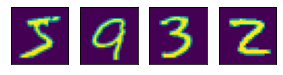

In [11]:
plot_example(small_X)

/usr/local/lib/python3.7/dist-packages/ot/bregman.py:2074: RuntimeWarning: overflow encountered in true_divide
  U = A / KV
/usr/local/lib/python3.7/dist-packages/ot/bregman.py:2077: RuntimeWarning: invalid value encountered in multiply
  nx.sum(weights[:, None, None] * nx.log(KU + stabThr), axis=0)
/usr/local/lib/python3.7/dist-packages/ot/bregman.py:2094: UserWarning: Convolutional Sinkhorn did not converge. Try a larger number of iterations `numItermax` or a larger entropy `reg`.
  warnings.warn("Convolutional Sinkhorn did not converge. "
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/local/lib/python3.7/dist-packages/ot/bregman.py:2072: RuntimeWarning: invalid value encountered in true_divide
  V = bar[None] / KU
/usr/local/lib/python3.7/dist-packages/ot/bregman.py:2072: RuntimeWarning: overflow encountered in true_divide
  V = bar[None] / KU
/usr/local/lib/python3.7/dist-

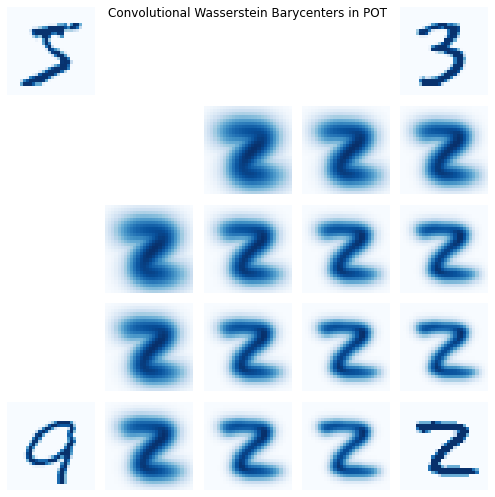

In [20]:
##############################################################################
# Data preparation and testing POT
# ----------------
#
# The four distributions are constructed from 4 simple images


nb_images = 5

# those are the four corners coordinates that will be interpolated by bilinear
# interpolation
v1 = np.array((1, 0, 0, 0))
v2 = np.array((0, 1, 0, 0))
v3 = np.array((0, 0, 1, 0))
v4 = np.array((0, 0, 0, 1))


##############################################################################
# Barycenter computation and visualization
# ----------------------------------------
#

fig, axes = plt.subplots(nb_images, nb_images, figsize=(7, 7))
plt.suptitle('Convolutional Wasserstein Barycenters in POT')
cm = 'Blues'
# regularization parameter
reg = 0.004
for i in range(nb_images):
    for j in range(nb_images):
        tx = float(i) / (nb_images - 1)
        ty = float(j) / (nb_images - 1)

        # weights are constructed by bilinear interpolation
        tmp1 = (1 - tx) * v1 + tx * v2
        tmp2 = (1 - tx) * v3 + tx * v4
        weights = (1 - ty) * tmp1 + ty * tmp2

        if i == 0 and j == 0:
            axes[i, j].imshow(small_X[0].reshape(28,28), cmap=cm)
        elif i == 0 and j == (nb_images - 1):
            axes[i, j].imshow(small_X[2].reshape(28,28), cmap=cm)
        elif i == (nb_images - 1) and j == 0:
            axes[i, j].imshow(small_X[1].reshape(28,28), cmap=cm)
        elif i == (nb_images - 1) and j == (nb_images - 1):
            axes[i, j].imshow(small_X[3].reshape(28,28), cmap=cm)
        else:
            axes[i, j].imshow(ot.bregman.convolutional_barycenter2d(small_X.reshape(4,28,28), reg, weights), cmap=cm
            )
        axes[i, j].axis('off')
plt.tight_layout()
plt.show()

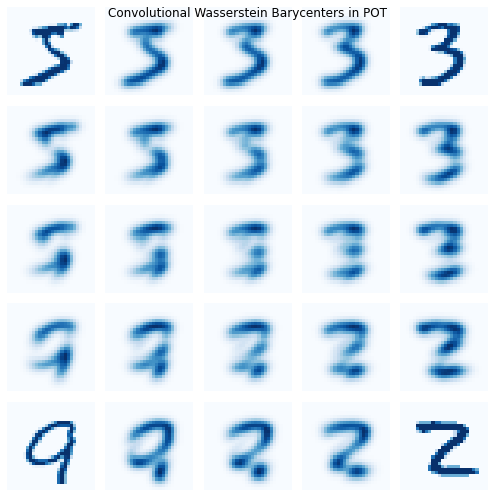

In [19]:
###############################
#test mine 
###############################

fig, axes = plt.subplots(nb_images, nb_images, figsize=(7, 7))
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

plt.suptitle('Convolutional Wasserstein Barycenters in POT')
cm = 'Blues'
# regularization parameter
reg = 0.004
for i in range(nb_images):
    for j in range(nb_images):
        tx = float(i) / (nb_images - 1)
        ty = float(j) / (nb_images - 1)

        # weights are constructed by bilinear interpolation
        tmp1 = (1 - tx) * v1 + tx * v2
        tmp2 = (1 - tx) * v3 + tx * v4
        weights = (1 - ty) * tmp1 + ty * tmp2

        if i == 0 and j == 0:
            axes[i, j].imshow(small_X[0].reshape(28,28), cmap=cm)
        elif i == 0 and j == (nb_images - 1):
            axes[i, j].imshow(small_X[2].reshape(28,28), cmap=cm)
        elif i == (nb_images - 1) and j == 0:
            axes[i, j].imshow(small_X[1].reshape(28,28), cmap=cm)
        elif i == (nb_images - 1) and j == (nb_images - 1):
            axes[i, j].imshow(small_X[3].reshape(28,28), cmap=cm)
        else:
            axes[i, j].imshow(convolutional_wasserstein_barycenter_2d(torch.from_numpy(small_X.reshape(4,28,28)).to(device), 
                                                          reg, torch.from_numpy(weights).to(device)).cpu(), 
                                                          cmap=cm
                                )
        axes[i, j].axis('off')
plt.tight_layout()
plt.show()